In [91]:
%matplotlib inline

# scikit-image 

### 0) Referências
- http://scikit-image.org/docs/stable/user_guide/getting_started.html
- http://scikit-image.org/docs/stable/api/api.html
- http://scikit-image.org/docs/stable/user_guide/data_types.html#data-types
- 


### 1) Introdução

<p> O **<code>scikit-image</code>** é um pacote do Python para processamento de imagens que funciona com arrays do numpy, importado como skimage. 


In [92]:
import skimage

<p>A maioria de suas funções são encontradas em submódulos. A lista contendo os submódulos e funções  do skimage é encontrada [aqui](http://scikit-image.org/docs/stable/api/api.html). Dentro do scikit-image, imagens são representadas como Numpy arrays, por exemplo arrays 2-D para imagens em escala de cinza 2-D.</p>
<p>O submódulo **<code>skimage.data</code>** fornece um grupo de funções retornando exemplos de imagens que podem ser usados para se acostumar rapidamente com o uso das funções do **skimage**.

In [93]:
from skimage import data

Uma das imagens que estão neste submódulo é  <code>camera</code>. A partir dela, podemos extrair informações como:

In [94]:
camera = data.camera()

In [ ]:
type(camera)

Como dito acima, as imagens são transformadas em arrays do Numpy. Como todo array, pode-se extrair seu <code>.shape</code> da seguinte forma.

In [ ]:
camera.shape

Ou seja, um array com 512 linhas e 512 colunas.

É possível carregar inclusive sua própria imagem como arrays do Numpy usando o módulo <code>io.imread()</code> da seguinte forma:


In [95]:
import os
from skimage import io

In [96]:
filename = os.path.join(skimage.data_dir, 'moon.png')

In [97]:
moon = io.imread(filename)

### 2) Informações rápidas sobre o Numpy

Imagens manipuladas pelo <code>scikit-image</code> são simplesmente arrays do Numpy. Por este motivo, uma grande fração das operações nas imagens irá consistir em usar o Numpy.

In [98]:
from skimage import data


In [99]:
camera = data.camera()
type(camera)

numpy.ndarray

Podemos obter informações como a geometria da imagem (<code>shape</code>) e o número de pixels (<code>size</code>), respectivamente, da seguinte forma:

In [ ]:
camera.shape 

In [ ]:
camera.size

Além disso, é possível obter informções estatísticas sobre os valores cinza. (preto = 0, branco = 255, cinza = escala dentro desses limites).
 

In [ ]:
camera.min(), camera.max(), camera.mean()

#### 2.1 - data types (dtypes) das Imagens, o que significam e como o scikit-image as trata. (Adicionar Info depois ~ [fonte](http://scikit-image.org/docs/stable/user_guide/data_types.html#data-types) )

Os arrays do Numpy podem ser de diferentes tipos de interger ou float. Para evitar distorções nas imagens, assumimos que imagens usam os seguintes dtypes ranges:

|  dtype | Range           |
|:------:|-----------------|
| uint8  | 0 a 255         |
| uint16 | 0 a 65535       |
| uint32 | 0 a 2³²         |
| float  | -1 a 1 ou 0 a 1 |
| int8   | -128 a 127      |
| int16  | -32768 a 32767  |
| int32  | -2³¹ a (2³¹ -1) |

Note que as imagens float devem ser restritas à range -1 a 1 mesmo sabendo que o data type por si só possa execeder este intervalo; Todos os interger dtypes, por outro lado, possuem intensidades de pixel que podem ocupar toda a range do data type. 


#### Indexação do Numpy
A indexação pode ser usada para descobrir valores dos pixels, e para modificá-los. Para acessar valores do array na 10ª linha e 20ª coluna usa-se:

In [100]:
camera[10,20]

153

Para alterar o valor acima, ou torná-lo preto (0) usa o seguinte comando:

In [101]:
camera[10,20] = 0

In [ ]:
camera[10,20]

Mas tome cuidado na Indexação do Numpy, a primeira dimensão (**<code>camera.shape[0]</code>**) corresponde a linhas, enquanto a segunda (**<code>camera.shape[1]</code>**) corresponde a colunas, com origem em (**<code>camera.shape[0,0]</code>**) no canto superior esquerdo. Isto ocorre de forma similar as notações de matrizes/algebra linear, mas entra contraste com coordenadas cartesianas (x,y). Mais adiante abordaremos o assunto com mais detalhes.

Indo um pouco mais adiante, além de pixels individuais, é possível acessar/modificar valores de um grupo de pixels usando as diferentes possibilidades de indexação do Numpy.

- Slicing:
<p>Na célula abaixo, transformamos todas as 10 primeiras linhas de camera em preto.</p>

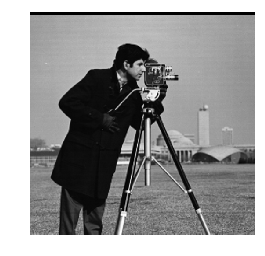

In [102]:
camera[:10] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

- Mascarando - Masking (indexando com mascaras de booleanas - True ou False):
<p>Antes vamos definir a máscara para valores menores que 87, depois aplicamos a máscara em câmera e modificamos os valores da máscara em branco (255).</p>

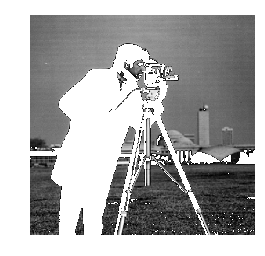

In [103]:
mask = camera < 87
camera[mask] = 255

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

- Indexando com grupos de indices

In [ ]:
import numpy as np

In [ ]:
import numpy as np
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r %len(camera)

**_ Obs: Em python, % retorna o resto de uma divisão x%y, na qual x é o numerador e y o denominador._**
<code>
\>>> 6%2
\>>> 0 
\>>> 6%5
\>>> 1
</code>
 **_em casos onde o numerador é menor que o denominador, o resultado da divisão é sempre zero e o resto será o próprio numerador pois trata-se de uma divisão por intergers_**.
 <code>
\>>> int(2/6)
\>>> 0 
\>>> 2%6
\>>> 2
</code>
 

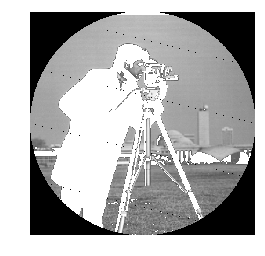

In [110]:
camera[inds_r, inds_c] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

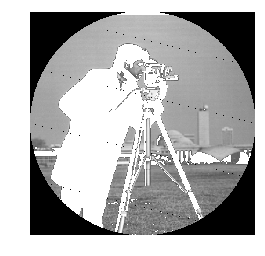

In [107]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
camera[:10] = 0
mask = camera < 87
camera[mask] = 255
inds_x = np.arange(len(camera))
inds_y = (4 * inds_x) % len(camera)
camera[inds_x, inds_y] = 0

l_x, l_y = camera.shape[0], camera.shape[1]
X, Y = np.ogrid[:l_x, :l_y]
outer_disk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2
camera[outer_disk_mask] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

#### Imagens Coloridas
 
Tudo dito acima é válido para imagens coloridas. Elas também são array do Numpy, mas com uma dimensão a mais para os canais de cor ( vermelho, verde , azul). 

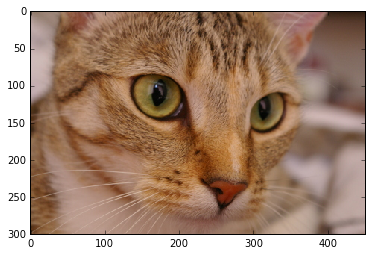

In [136]:
cat = data.chelsea()
plt.imshow(cat)

In [123]:
type(cat)

numpy.ndarray

In [124]:
cat.shape

(300, 451, 3)

**<code>cat</code>** é uma imagem de 300x451 pixels com três canais (red, green, blue). Como as imagens acima, podemos obter e definir valores aos pixels.

In [137]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

In [139]:
cat[50,60] = 0

Para tornar verde o pixel:

In [141]:
cat[50,61] = [0,255,0] #[red,green,blue]

Para usar uma mask numa imagem colorida:

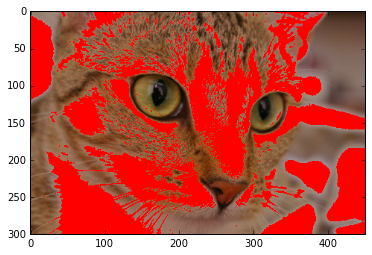

In [143]:
cat = data.chelsea()
reddish = cat[:,:,0] > 160
cat[reddish] = [255, 0, 0]
plt.imshow(cat)

### Convenções de Coordenadas
<p>Como representamos imagens como arrays do Numpy, nossas coordenadas devem estar de acordo. Imagens em escala de cinza bidimensionais (2D) como a câmera acima são indexadas por linha (row) e coluna (columns) (abreviados para ou ** <code>row, col</code>** quanto para **<code>r, c</code>**), com o menor elemento (0,0) no topo do canto esquerdo. Em várias partes da biblioteca, você também verá **<code>rr, cc</code>** se referindo a listas com coordenadas de linhas e colunas.Isto é uma distinção do par ordenado (x,y), comumente denotando coordenadas cartesianas, onde x é a coordenada horizontal, y a vertical e a origem no canto inferior esquerdo. O pacote matblotlib, por exemplo, usa essa conveção.<p>
<p> No caso de imagens coloridas (ou de multicanal), a última dimensão contém a informação das cores e é denotada por **<code>channel</code>** ou **<code>ch</code>**.

Finalmente, em imagens 3D, como vídeos, Imagens de Ressonância Magnética (IRM), a dimensão que lidera é **<code>plane</code>**, abreviada como  **<code>pln</code>** ou **<code>pl</code>**.

Essas dimensões são resumidas na tabela abaixo:

| **Tipo de Imagem** | **Coordenadas**     |
|:------------------:|---------------------|
| 2D Escala de Cinza | (row, col)          |
|    2D multicanal   | (row, col, ch)      |
| 3D Escala de Cinza | (pln, row, col)     |
| 3D multicanal      | (pln, row, col, ch) |

Muitas funções in scikit-image operam diretamente em imagens 3D:

In [3]:
import numpy
help(numpy.random.rand)

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and propagate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]